In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls


bp_saya_text-summarization-seq2seq.ipynb  LexRank.ipynb  SumBasic.ipynb
dataset/                                  LSA.ipynb      TextRank.ipynb


In [ ]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Genie_Thesis


In [ ]:
%ls


bp_saya_text-summarization-seq2seq.ipynb  LexRank.ipynb  SumBasic.ipynb
dataset/                                  LSA.ipynb      TextRank.ipynb


In [ ]:
cd MyDrive/

[Errno 2] No such file or directory: 'MyDrive/'
/content/drive/MyDrive/Genie_Thesis


In [ ]:
ls

bp_saya_text-summarization-seq2seq.ipynb  LexRank.ipynb  SumBasic.ipynb
dataset/                                  LSA.ipynb      TextRank.ipynb


In [ ]:
cd Genie_Thesis/

[Errno 2] No such file or directory: 'Genie_Thesis/'
/content/drive/MyDrive/Genie_Thesis


In [ ]:
ls

bp_saya_text-summarization-seq2seq.ipynb  LexRank.ipynb  SumBasic.ipynb
dataset/                                  LSA.ipynb      TextRank.ipynb


In [ ]:
#!pip install tensorflow-gpu==1.15
# import keras==2.2.4
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

In [ ]:
data_train=pd.read_csv("dataset/train_E.csv",nrows=20000)#100000
data_train[['Description','Summary']].sample(5)
#data_train.head()
print(len(data_train))

20000


In [ ]:
data_train.drop_duplicates(subset=['Description'],inplace=True)  #dropping duplicates
data_train.dropna(axis=0,inplace=True)

In [ ]:
data_val=pd.read_csv("dataset/val_E.csv",nrows=1000)#100000
data_val[['Description','Summary']].sample(5)
data_val.head(5)
print(len(data_val))

1000


In [ ]:
data_val.drop_duplicates(subset=['Description'],inplace=True)  #dropping duplicates
data_val.dropna(axis=0,inplace=True)

In [ ]:
data_test=pd.read_csv("dataset/test_E.csv",nrows=500)#100000
data_test[['Description','Summary']].sample(5)
data_test.head(5)
print(len(data_test))

500


In [ ]:
data_test.drop_duplicates(subset=['Description'],inplace=True)  #dropping duplicates
data_test.dropna(axis=0,inplace=True)

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:

data_train['Description'][:10]

0    referring now to the drawings and first to fig1 a and 1b , a tubing conveyed perforating gun ( tcp gun ) incorporating an adiabatic detonating mechanism constructed in accordance with the present ...
1    this invention uses a methodology called “ function - oriented material design ,” or fomd , to design materials for the specific , demanding tasks . in order to carry out a fomd , first the functi...
2    turning now to the drawings wherein elements are identified by numbers and like elements are identified by like numbers throughout the 10 figures , the invention is depicted in fig1 and shows a lo...
3    in the following description of the preferred embodiment , reference is made to the accompanying drawings which form a part hereof , and in which is shown by way of illustration specific embodimen...
4    one embodiment of a bedroom cabinet of the present invention shown in fig1 through 6 will be described . a bedroom cabinet has an upper outer housing 11 and a lower outer hous

In [ ]:
data_val['Description'][:10]

0    the invention comprises a pair of tubes with a first tube having a top and bottom . the bottom of the first tube comprises an open bottom and has an interior profile , the preferred profile is fru...
1    the scaffolding system according to a particular embodiment of the present invention will hereinafter be described with reference to the drawings . the phrase ‘ scaffolding assembly ’ refers to th...
2    now referring to fig1 , there is shown a subterranean well w . the well w includes previously run and set a first conduit string or casing c - 1 . as shown the casing string c - 1 has a series of ...
3    embodiments of the disclosure relate to a urinal screen and system for placement over the drain of a urinal . the present urinal screen and assemblies provide a robust design that allows not only ...
4    the simplest embodiment shown in fig1 has only an interchangeable bottom plate although the inner walls of the support bell 2 can also be protected by disposable parts possibl

In [ ]:
data_test['Description'][:10]

0    referring now to the drawings in detail , and particularly to fig1 there is shown a safety gate assembly 10 for mezzanines 12 or other elevated platforms to provide a solid barrier which satisfies...
1    fig2 is a plan view of a cooling tower basin of the type over which cooling towers like those illustrated in fig1 are assembled . fig2 also shows the final locations of each cell of an eight cell ...
2    as illustrated in fig1 and 3 , the clad frame system 1 of the present invention includes first and second upright frame members 4 , 7 that are spaced and parallel to each other . the frame system ...
3    as seen in fig2 , a vertical dry , or plastered , wall 20 is supported from a wood post structure 21 . the wall 20 forms one side of a room within a building and generally extends from the floor t...
4    [ 0025 ] fig1 presents a cross - sectional view of a wellbore 50 , which has been completed for the production of hydrocarbons . the wellbore 50 extends downward into a format

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text_train = []
for t in data_train['Description']:
    cleaned_text_train.append(text_cleaner(t))

cleaned_text_val = []
for t in data_val['Description']:
    cleaned_text_val.append(text_cleaner(t))    

# for test data

cleaned_text_test = []
for t in data_test['Description']:
    cleaned_text_test.append(text_cleaner(t)) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_train['Summary'][:10]

0    a method and apparatus for achieving adiabatic heat ignition of combustible material , particularly explosive compositions which involves entrapping a quantity of gas in a chamber which is in comm...
1    biomimetic tendon - reinforced ” composite structures feature improved properties including a very high strength - to - weight ratio . a basic structure comprises a plurality of spaced - apart stu...
2    a load - limiting device for using in a braced frame structure is provided . the load - limiting device may be placed in a braced frame and connected to the braces of the braced frame . the load -...
3    a multi - paned fenestration unit in which the glass panes are manufactured directly into the support structure without first manufacturing an insulated glass unit . the support structure is desig...
4    a bedroom cabinet having a floor area at least approximately equal to an area of a bed and a height such that a user can erect the upper half of his body on the bed . this cab

In [ ]:
data_val['Summary'][:10]

0    the present invention is an apparatus and a method for casting a cementitious or stone pile into the ground . the present invention comprises an exterior driving casing and an interior mandrel act...
1    a scaffolding system and method of moving a scaffolding assembly of said system , the system including a scaffold assembly including a plurality of elongate members said members including support ...
2    a well tool and method for heating and depositing first and second charges of selective temperature melting metal alloys for repairing failure spots along a section of a tubular conduit , such as ...
3    the disclosure provides a urinal screen comprising a flexible screen in a circular configuration having a center portion and a contiguous outer portion encircling the center portion , the outer po...
4    a collector for dog droppings includes a stick provided with a support bell at its ground - side end . the stick includes at its lower end an extension which projects through 

In [ ]:
data_test['Summary'][:10]

0    a pivotable safety gate having a pair of spaced apart parallel support frames which each have a distal end and a proximal end . the frames each have a support stanchion which is disposed adjacent ...
1    a method and structure for assembling field erected cooling . a first cell or cell portion is assembled at the opposite end of the cooling basin from its final location and used as a scaffold from...
2    a cladded door frame system includes spaced left and right frame members orthogonally joined at upper portions thereof to a header , thus defining a door opening having exterior and interior sides...
3    a perimeter clip attached to a wall molding that supports a beam in a suspended ceiling intended to survive seismic disturbances . the clip is capable , during an earthquake , of permitting an end...
4    the present invention involves a method and apparatus for communicating from within a wellbore to the surface of the wellbore , as well as communicating from the surface of th

In [ ]:

def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary_train = []
for t in data_train['Summary']:
    cleaned_summary_train.append(summary_cleaner(t))

data_train['cleaned_text']=cleaned_text_train
data_train['cleaned_summary']=cleaned_summary_train
data_train['cleaned_summary'].replace('', np.nan, inplace=True)
data_train.dropna(axis=0,inplace=True)

#Call the above function
cleaned_summary_val = []
for t in data_val['Summary']:
    cleaned_summary_val.append(summary_cleaner(t))

data_val['cleaned_text']=cleaned_text_val
data_val['cleaned_summary']=cleaned_summary_val
data_val['cleaned_summary'].replace('', np.nan, inplace=True)
data_val.dropna(axis=0,inplace=True)

#Call the above function test
cleaned_summary_test = []
for t in data_test['Summary']:
    cleaned_summary_test.append(summary_cleaner(t))

data_test['cleaned_text']=cleaned_text_test
data_test['cleaned_summary']=cleaned_summary_test
data_test['cleaned_summary'].replace('', np.nan, inplace=True)
data_test.dropna(axis=0,inplace=True)

In [ ]:

data_train['cleaned_summary'] = data_train['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')
data_val['cleaned_summary'] = data_val['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')
#test
data_test['cleaned_summary'] = data_test['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
for i in range(5):
    print("Review:",data_train['cleaned_text'][i])
    print("Summary:",data_train['cleaned_summary'][i])
    print("\n")

Review: referring drawings first fig tubing conveyed perforating gun incorporating adiabatic detonating mechanism constructed accordance present invention illustrated generally tcp gun may incorporate plurality sub assemblies including firing head illustrated generally adapted achieve detonation explosive chain including detonating cord tcp gun also includes one perforating subs illustrated generally incorporating plurality spaced shaped charges disposed detonation detonating cord extends coupled primer shaped charges referring particularly firing head sub assembly coupler provided defines externally threaded upper extremity enabling tcp gun received lower internally threaded extremity well tubing string coupler also defines tapered internal guide surface serves guide lower striking end drop bar internal passage drop bar shown broken lines accurately aligned striking releasing function passage typically described passage sufficiently small dimension permit striking portion drop bar pas

In [ ]:
for i in range(5):
    print("Review:",data_val['cleaned_text'][i])
    print("Summary:",data_val['cleaned_summary'][i])
    print("\n")

Review: invention comprises pair tubes first tube top bottom bottom first tube comprises open bottom interior profile preferred profile frusto conical second tube top bottom bottom second tube preferred exterior profile adapted mate interior profile first tube thereby sealing open bottom first tube profiles come contact open slots provided profile second tube allow transfer material interior second tube open bottom first tube profiles disengage specific detail preferred embodiment discussed preferred embodiment comprises exterior casing interior mandrel see fig casing mandrel may cross section long mandrel able fit slidably within casing tubes upper end lower end upper end mandrel first pile driver receiving plate receives direct blows pile driver pile driver plate turn rest second plate annular opening whereby mandrel may inserted plate attached top end casing pile driver strikes plate energy strike transmitted plate turns drives casing ground accordingly casing bears majority stresse

In [ ]:
#test
for i in range(5):
    print("Review:",data_test['cleaned_text'][i])
    print("Summary:",data_test['cleaned_summary'][i])
    print("\n")

Review: referring drawings detail particularly fig shown safety gate assembly mezzanines elevated platforms provide solid barrier satisfies safety regulations barrier always place blocking opening entryway mezzanine floor gate assembly provides pair parallel spaced apart generally inverted shaped siderail assemblies mounted floor mezzanine siderail assembly includes pair parallel spaced apart legs opposite ends connected upper horizontal bar intermediate horizontal bar lowermost horizontal bar connectively arranged spaced apart legs pivot stanchion disposed critically near one end uppermost horizontal bar upright siderail assemblies open space alongside siderails particular short support proximal gate orientation siderail assemblies hinder access area within gate assembly area location inwardly pivot axis gates shown open space fig upright stanchions spaced apart siderail assemblies alignment one another stanchions bore axial bore corresponding stantion swingable frame gate assembly di

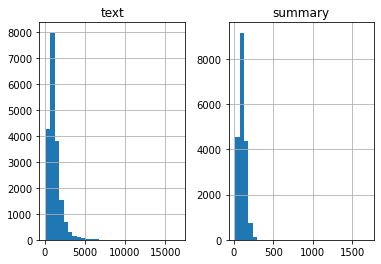

In [ ]:

import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data_train['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data_train['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

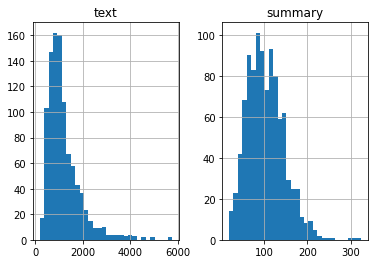

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data_val['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data_val['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

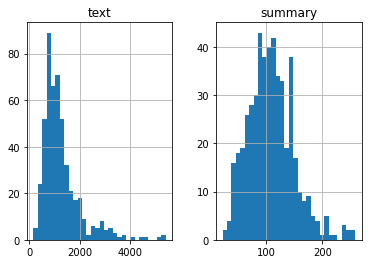

In [ ]:
#test
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data_test['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data_test['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:

max_len_text=2500#80 
max_len_summary=200#10
#from sklearn.model_selection import train_test_split
#x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)
x_tr = data_train['cleaned_text']
x_val = data_val['cleaned_text']
y_tr = data_train['cleaned_summary']
y_val = data_val['cleaned_summary']

In [ ]:
print(x_tr.shape)
print(y_tr.shape)
print(x_val.shape)
print(x_val.shape)

(18984,)
(18984,)
(1000,)
(1000,)


In [ ]:
#test
x_test = data_test['cleaned_text']
y_test = data_test['cleaned_summary']
print(x_test.shape)
print(y_test.shape)

(498,)
(498,)


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

##test##
x_test   =   x_tokenizer.texts_to_sequences(x_test)
##test##

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

##test##
x_test   =   pad_sequences(x_test, maxlen=max_len_text, padding='post')
##test##

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

##test##
y_test   =   y_tokenizer.texts_to_sequences(y_test)
##test##

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

##test##
y_test   =   pad_sequences(y_test, maxlen=max_len_text, padding='post')
##test##

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:

import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 110#220#500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2500)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2500, 110)    7007220     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 2500, 110),  97240       embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
x_tr
y_tr[:,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

array([[[  317],
        [   11],
        [    1],
        ...,
        [ 1564],
        [  951],
        [    8]],

       [[14489],
        [ 3452],
        [  919],
        ...,
        [    0],
        [    0],
        [    0]],

       [[  270],
        [ 1515],
        [   34],
        ...,
        [    0],
        [    0],
        [    0]],

       ...,

       [[   47],
        [    5],
        [  102],
        ...,
        [    0],
        [    0],
        [    0]],

       [[    9],
        [ 2931],
        [ 5483],
        ...,
        [    0],
        [    0],
        [    0]],

       [[  539],
        [   62],
        [   27],
        ...,
        [    0],
        [    0],
        [    0]]], dtype=int32)

In [ ]:
#batch_size=512
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=15,callbacks=[es],batch_size=32, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/15
594/594 [==============================] - 784s 1s/step - loss: 3.3307 - val_loss: 2.9833
Epoch 2/15
594/594 [==============================] - 783s 1s/step - loss: 2.8754 - val_loss: 2.7940
Epoch 3/15
594/594 [==============================] - 787s 1s/step - loss: 2.7250 - val_loss: 2.6820
Epoch 4/15
594/594 [==============================] - 783s 1s/step - loss: 2.6234 - val_loss: 2.6103
Epoch 5/15
594/594 [==============================] - 787s 1s/step - loss: 2.5556 - val_loss: 2.5623
Epoch 6/15
594/594 [==============================] - 783s 1s/step - loss: 2.5039 - val_loss: 2.5272
Epoch 7/15
594/594 [==============================] - 787s 1s/step - loss: 2.4599 - val_loss: 2.4961
Epoch 8/15
594/594 [==============================] - 784s 1s/step - loss: 2.4232 - val_loss: 2.4717
Epoch 9/15
594/594 [==============================] - 787s 1s/step - loss: 2.3914 - val_loss: 2.4516
Epoch 10/15
594/594 [==============================] - 783s 1s/step - loss: 2.3628 - val_lo

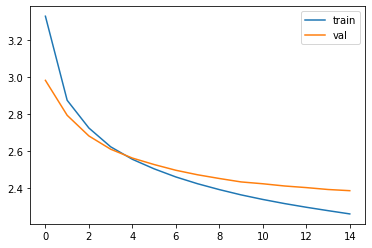

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='val') 
pyplot.legend() 
pyplot.show()

In [ ]:
history.history

{'loss': [3.3306567668914795,
  2.875406503677368,
  2.7250261306762695,
  2.6233878135681152,
  2.5555667877197266,
  2.5039196014404297,
  2.4599053859710693,
  2.4231631755828857,
  2.391385555267334,
  2.3627915382385254,
  2.3380126953125,
  2.3156914710998535,
  2.295717477798462,
  2.277350425720215,
  2.259660243988037],
 'val_loss': [2.9832589626312256,
  2.7939677238464355,
  2.6820425987243652,
  2.610276937484741,
  2.5622525215148926,
  2.5272045135498047,
  2.4961328506469727,
  2.4717142581939697,
  2.451554536819458,
  2.432983160018921,
  2.4230616092681885,
  2.410989999771118,
  2.402256727218628,
  2.3919289112091064,
  2.3855655193328857]}

In [ ]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('text_summary_saya_15_32_110.h5')    
###model_file = drive.CreateFile({'title' : 'text_summary_saya_10_32_110.h5'})
###model_file.SetContentFile('text_summary_saya_10_32_110.h5')
###model_file.Upload()
print('upload done')

# download to google drive
###drive.CreateFile({'id': model_file.get('id')})


upload done


In [ ]:

reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    ####print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        ####print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
len(x_test)

498

In [ ]:
'''
#for i in range(len(x_val)):#x_val
for i in range(0,5):#x_val#
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

'''  
#for i in range(len(x_val)):#x_val
rev = []
o_sum = []
p_sum = []
for i in range(0,100):#x_val#
  print("Review:",seq2text(x_test[i]))
  rev.append(seq2text(x_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  o_sum.append(seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(x_test[i].reshape(1,max_len_text)))
  p_sum.append(decode_sequence(x_test[i].reshape(1,max_len_text)))
  print("\n")

Review: referring drawings detail particularly fig shown safety gate assembly mezzanines elevated platforms provide solid barrier satisfies safety regulations barrier always place blocking opening entryway mezzanine floor gate assembly provides pair parallel spaced apart generally inverted shaped siderail assemblies mounted floor mezzanine siderail assembly includes pair parallel spaced apart legs opposite ends connected upper horizontal bar intermediate horizontal bar lowermost horizontal bar connectively arranged spaced apart legs pivot stanchion disposed critically near one end uppermost horizontal bar upright siderail assemblies open space alongside siderails particular short support proximal gate orientation siderail assemblies hinder access area within gate assembly area location inwardly pivot axis gates shown open space fig upright stanchions spaced apart siderail assemblies alignment one another stanchions bore axial bore corresponding stantion swingable frame gate assembly di

In [ ]:
print(len(rev))
print(len(o_sum))
print(len(p_sum))
data_ = {'Review':rev,'Original_Summary':o_sum,'Predicted_Summary':p_sum}
df = pd.DataFrame(data_)
df.head(5)


100
100
100


,Review,Original_Summary,Predicted_Summary
0,referring drawings detail particularly fig shown safety gate assembly mezzanines elevated platforms provide solid barrier satisfies safety regulations barrier always place blocking opening entrywa...,pivotable safety gate having pair of spaced apart parallel support frames which each have distal and proximal the frames each have support stanchion which is disposed adjacent the proximal of the ...,an improved gate for use in conjunction with an opening for opening and closing the vehicle in one embodiment the apparatus includes an elongated member having first
1,fig plan view cooling tower basin type cooling towers like illustrated fig assembled fig also shows final locations cell eight cell cooling tower finally fig also shows longitudinal positions asse...,method and structure for assembling field erected cooling first cell or cell portion is assembled at the opposite of the cooling basin from its final location and used as scaffold from which the r...,the present invention relates to method and apparatus for constructing building structure in which the system includes plurality of modules for supporting the building structure the system includ...
2,illustrated fig clad frame system present invention includes first second upright frame members spaced parallel frame system also includes header frame member extending topmost portions upright fr...,cladded door frame system includes spaced left and right frame members orthogonally joined at upper portions thereof to header thus defining door opening having exterior and interior sides each fr...,an improved door assembly for use in conjunction with an opening of an opening in the building frame and an opening in the frame of the frame and the frame member is formed by an elongated member...
3,seen fig vertical dry plastered wall supported wood post structure wall forms one side room within building generally extends floor structural ceiling suspended ceiling grid type shown instance pa...,perimeter clip attached to wall molding that supports beam in suspended ceiling intended to survive seismic disturbances the clip is capable during an earthquake of permitting an of beam at one of...,the present invention relates to an improved method for constructing an underground ceiling comprising at least one support member for supporting the support member and the support structure is a...
4,fig presents cross sectional view wellbore completed production hydrocarbons wellbore extends downward formation sometimes referred industry pay zone area interest production depth wellbore string...,the present invention involves method and apparatus for communicating from within wellbore to the surface of the wellbore as well as communicating from the surface of the wellbore to downhole with...,method and apparatus for monitoring the well in wellbore and method for controlling the flow of fluids in wellbore and the wellbore is provided with an annular space between the wellbore and the ...


In [ ]:
from google.colab import files
df.to_csv('seq2seq.csv') 
print('done')

done


In [ ]:
#df.to_csv('G:\\master thesis\\Result_CSV\\seq2seq.csv', encoding='utf-8', index=0)
#print('csv file generated1')
#d = data_train=pd.read_csv("seq2seq.csv")
#d.head(10)

In [ ]:
!pip install rouge
from rouge import Rouge
rouge = Rouge()

rouge.get_scores(p_sum, o_sum, avg=True)

{'rouge-1': {'f': 0.19391135756127448,
  'p': 0.246471370138475,
  'r': 0.2094715533375066},
 'rouge-2': {'f': 0.03124808049488452,
  'p': 0.038841522811395676,
  'r': 0.03351812756431883},
 'rouge-l': {'f': 0.16630262191258605,
  'p': 0.29255111657687405,
  'r': 0.1225300081214585}}

In [ ]:

print("Review:",seq2text(x_test[0]))
print("Original summary:",seq2summary(y_test[0]))
print("Predicted summary:",decode_sequence(x_test[0].reshape(1,max_len_text)))

Review: referring drawings detail particularly fig shown safety gate assembly mezzanines elevated platforms provide solid barrier satisfies safety regulations barrier always place blocking opening entryway mezzanine floor gate assembly provides pair parallel spaced apart generally inverted shaped siderail assemblies mounted floor mezzanine siderail assembly includes pair parallel spaced apart legs opposite ends connected upper horizontal bar intermediate horizontal bar lowermost horizontal bar connectively arranged spaced apart legs pivot stanchion disposed critically near one end uppermost horizontal bar upright siderail assemblies open space alongside siderails particular short support proximal gate orientation siderail assemblies hinder access area within gate assembly area location inwardly pivot axis gates shown open space fig upright stanchions spaced apart siderail assemblies alignment one another stanchions bore axial bore corresponding stantion swingable frame gate assembly di

In [ ]:

print("Review:",seq2text(x_val[10]))
print("Original summary:",seq2summary(y_val[10]))
print("Predicted summary:",decode_sequence(x_val[10].reshape(1,max_len_text)))

Review: subject matter embodiments present invention described specificity meet statutory requirements description necessarily intended limit scope claims claimed subject matter may embodied ways may include different elements steps may used conjunction existing future technologies description interpreted implying particular order arrangement among various steps elements except order individual steps arrangement elements explicitly described north american softwood framing lumber identified nominal width thickness dimensions inches length feet actual width thicknesses lumber less nominal sizes following table sets forth typical actual dimensions opposite nominal sizes nominal sizes routinely used refer lumber dimensions generally applicable treated untreated wood lumber often also used man made construction materials manufactured wood fiber cement polymer products blocks invention may manufactured recesses serve either alone together another recess form pockets intended receive hold po

In [ ]:

print("Review:",seq2text(x_val[100]))
print("Original summary:",seq2summary(y_val[100]))
print("Predicted summary:",decode_sequence(x_val[100].reshape(1,max_len_text)))

Review: referring fig string casing previously installed cemented wellbore liner string extends casing string total depth wellbore yet cemented place term liner string refers string well pipe extend way wellhead rather eventually cemented wellbore upper end short distance lower end casing string terms casing liner may used interchangeably embodiment liner string normally deployed drilling wellbore time liner string lowered well referring fig cementing retainer profile annular recess also located near lower end casing string liner drilling bottom hole assembly extends lower end liner string bha shown dotted lines retrieved example cementing occurs bha includes drill bit normally additional equipment underreamer optionally surveying instruments directional drilling equipment liner string also includes torque profile sub near upper end liner string embodiment torque sub internal profile vertical splines liner running tool releasably secures upper section work string drill pipe torque sub 

In [ ]:

print("Review:",seq2text(x_val[200]))
print("Original summary:",seq2summary(y_val[200]))
print("Predicted summary:",decode_sequence(x_val[200].reshape(1,max_len_text)))

Review: required detailed embodiments present invention disclosed herein however understood disclosed embodiments merely exemplary invention may embodied various forms therefore specific functional structural details disclosed herein interpreted limiting merely basis claims representative basis teaching one skilled art variously employ present invention virtually appropriately detailed structure aims objects invention accomplished providing construction assembly securely hold coverings allows ease covering replacement referring drawings detail particularly fig shown preferred embodiment construction assembly support member elongated reusable channel formed single piece material extruded aluminum plastic support member defined base inside surface outside surface thickness therebetween inches inches first upstand wall means base portion inner surface outer surface extending perpendicular lower edge fixed base upper edge corner forming insertion lip perpendicular wall projecting inwardly 

In [ ]:

print("Review:",seq2text(x_test[30]))
print("Original summary:",seq2summary(y_test[30]))
print("Predicted summary:",decode_sequence(x_test[30].reshape(1,max_len_text)))

Review: figure schematic diagram illustrating apparatus according embodiments invention downhole unit includes cooling unit light source sensor unit consisting scatter limiting aperture scintillator amplifier unit charge coupled device photodiode assembly light source produces high energy photons wavelength greater preferably embodiments use light sources emit high energy photons wavelength rays wavelength desired effect terms image quality energy level penetration relevant fluids photons illuminate downhole target object photons result bireflection electron density downhole object pass aperture interact surface scintillator amplifier unit resulting photons majority wavelengths due effect scintillator incident reflected radiation interact cell composition ccd pda producing cellular electronic charge magnitude character proportional intensity spectral energy incoming photons accumulated electronic charge arises cells ccd pda collected holding buffer ccd individual cellular electronic po